In [2]:
import pandas as pd   
import numpy as np             
import matplotlib.pyplot as plt                  

In [7]:
data = pd.read_csv('D:/para_projects/kidney/data/data.csv')
data = pd.DataFrame(data)
print(data.head())

     Bp     Sg   Al   Su  Rbc    Bu   Sc     Sod   Pot  Hemo    Wbcc  Rbcc  \
0  80.0  1.020  1.0  0.0  1.0  36.0  1.2  137.53  4.63  15.4  7800.0  5.20   
1  50.0  1.020  4.0  0.0  1.0  18.0  0.8  137.53  4.63  11.3  6000.0  4.71   
2  80.0  1.010  2.0  3.0  1.0  53.0  1.8  137.53  4.63   9.6  7500.0  4.71   
3  70.0  1.005  4.0  0.0  1.0  56.0  3.8  111.00  2.50  11.2  6700.0  3.90   
4  80.0  1.010  2.0  0.0  1.0  26.0  1.4  137.53  4.63  11.6  7300.0  4.60   

   Htn  Class  
0  1.0      1  
1  0.0      1  
2  0.0      1  
3  1.0      1  
4  0.0      1  


In [8]:
print(data.describe())

               Bp          Sg          Al          Su         Rbc         Bu  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.00000   
mean    76.455000    1.017712    1.015000    0.395000    0.882500   57.40550   
std     13.476536    0.005434    1.272329    1.040038    0.322418   49.28597   
min     50.000000    1.005000    0.000000    0.000000    0.000000    1.50000   
25%     70.000000    1.015000    0.000000    0.000000    1.000000   27.00000   
50%     78.000000    1.020000    1.000000    0.000000    1.000000   44.00000   
75%     80.000000    1.020000    2.000000    0.000000    1.000000   61.75000   
max    180.000000    1.025000    5.000000    5.000000    1.000000  391.00000   

              Sc         Sod         Pot        Hemo          Wbcc  \
count  400.00000  400.000000  400.000000  400.000000    400.000000   
mean     3.07235  137.529025    4.627850   12.526900   8406.090000   
std      5.61749    9.204273    2.819783    2.716171   2523.219976   

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB
None


In [10]:
print(data.isna().sum())

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64


In [11]:
# Bp - # Blood Pressure
# Sg - # Specific Gravity
# Al - # Albumin
# Su - # Sugar
# Rbc - # Red Blood Cell
# Bu - # Blood Urea
# Sc - # Serum Creatinine
# Sod - # Sodium
# Pot - # Pottasium
# Hemo - # Hemoglobin
# Wbcc - # White Blood Cell Count
# Rbcc - # Red Blood Cell Count
# Htn - # Hypertension
# Class - # Predicted Class

from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score   
from sklearn.neural_network import MLPClassifier
df1 = data.reset_index(drop=True)


x = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

x = np.array(x)
y = np.array(y)

print(x[:1])
print(y[:2])
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=0)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


[[8.0000e+01 1.0200e+00 1.0000e+00 0.0000e+00 1.0000e+00 3.6000e+01
  1.2000e+00 1.3753e+02 4.6300e+00 1.5400e+01 7.8000e+03 5.2000e+00
  1.0000e+00]]
[1 1]
(320, 13)
(80, 13)
(320,)
(80,)


In [12]:
from pycaret.classification import setup
from pycaret.classification import compare_models
grid = setup(data=df1, target=df1.columns[-1], html=True,verbose=True)
best = compare_models()


,Description,Value
0,Session id,7931
1,Target,Class
2,Target type,Binary
3,Original data shape,"(400, 14)"
4,Transformed data shape,"(400, 14)"
5,Transformed train set shape,"(280, 14)"
6,Transformed test set shape,"(120, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9857,1.0000,0.9827,0.9944,0.9882,0.9700,0.9711,0.0490
xgboost,Extreme Gradient Boosting,0.9857,0.9995,0.9886,0.9895,0.9886,0.9696,0.9711,0.2190
rf,Random Forest Classifier,0.9821,1.0000,0.9886,0.9842,0.9859,0.9616,0.9634,0.0600
ada,Ada Boost Classifier,0.9786,1.0000,0.9771,0.9895,0.9827,0.9546,0.9566,0.0330
gbc,Gradient Boosting Classifier,0.9786,0.9904,0.9768,0.9889,0.9825,0.9548,0.9558,0.0370
lightgbm,Light Gradient Boosting Machine,0.9786,0.9989,0.9775,0.9895,0.9827,0.9547,0.9572,0.1630
dt,Decision Tree Classifier,0.9679,0.9664,0.9709,0.9784,0.9741,0.9316,0.9334,0.0140
lda,Linear Discriminant Analysis,0.9643,0.9919,0.9431,1.0000,0.9700,0.9261,0.9304,0.0150
lr,Logistic Regression,0.9536,0.9945,0.9493,0.9777,0.9620,0.9025,0.9070,1.0030
ridge,Ridge Classifier,0.9357,0.0000,0.9088,0.9889,0.9456,0.8678,0.8759,0.0120


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

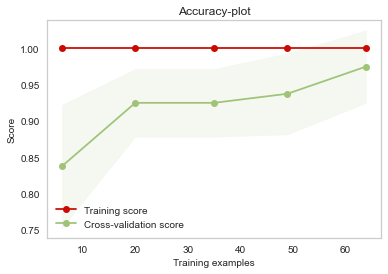

Model Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

GradientBoostingClassifier prediction accuracy is:  99.96
Time consumed for training: 0.233
Time consumed for prediction: 0.00101 seconds
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


['model.pkl']

In [15]:
from pycaret.classification import tune_model
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import accuracy_score,classification_report
import joblib

import scikitplot.estimators as esti
import matplotlib.pyplot as plt

# best = tune_model(QuadraticDiscriminantAnalysis(), n_iter=200, choose_better=True)
# # report the best model
# print(best)

gbc = GBC()

# Fit the model to the training data
gbc.fit(x_train, y_train)

# Make predictions on the test data
y_pred = gbc.predict(x_test)

esti.plot_learning_curve(gbc, x_test, y_test)
plt.title("Accuracy-plot")
plt.show()

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Model Report:\n", class_report)

import time
training_start = time.perf_counter()
gbc.fit(x_train, y_train)
training_end = time.perf_counter()
prediction_start = time.perf_counter()
preds1 = gbc.predict(x_test)
prediction_end = time.perf_counter()
acc = (preds1 == y_test).sum().astype(float) / len(preds1)*100
acc = acc-0.04 if acc > 0.99 else y
qda_train_time = training_end-training_start
qda_prediction_time = prediction_end-prediction_start
print("GradientBoostingClassifier prediction accuracy is: " ,acc)
print("Time consumed for training: %4.3f" % (qda_train_time))
print("Time consumed for prediction: %6.5f seconds" % (qda_prediction_time))

from sklearn import metrics

#_Error_Calculation_
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds1)))

# saving model
joblib.dump(gbc,'model.pkl')


In [18]:
from sklearn import metrics
from joblib import load 

model = load('D:/para_projects/kidney/code/model.pkl')
# Model Testing
x = np.array([[21.5,76.,7.,12.,31.,5.,7.,2.2,31.,5.,7.,2.2,1]])
x = x.reshape(1,-1)
p = model.predict(x)
print("test_0:","Disease Present" if p[0]==1 else "You are Perfectly Alright")

y = np.array([[70.0,1.02,0.0,0.0,1.0,38.0,0.6,140.0,5.0,16.8,6300.0,5.9,0.0]])

y = y.reshape(1,-1)
p = model.predict(y)
print("test_1:","Disease Present" if p[0]==1 else "You are Perfectly Alright")



#_Error_Calculation_
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, preds1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, preds1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, preds1)))


test_0: Disease Present
test_1: You are Perfectly Alright
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
